In [58]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageFilter
import fnmatch
import os, os.path
import glob


In [59]:
def x_add(img, x_train_dummy): # function to convert image to np.array and add to given array for cnn model's x input
    np_img_norm = np.array(img) / 255
    if x_train_dummy is None:
        x_train_dummy = np_img_norm
    else:
        x_train_dummy = np.concatenate((x_train_dummy, np_img_norm))
    return x_train_dummy

def x_value(str, x_train_dummy, augment=bool): # function to search in folder specified from string input 
    for img in glob.glob(f'{str}/*'): 
        img0 = Image.open(img).convert("RGB").resize((64,64)) 
        if augment==True: # runs image augmentation on each image found if augment input is true
            img1 = img0.transpose(Image.FLIP_LEFT_RIGHT)
            filter_b = ImageEnhance.Brightness(img0)
            img2 = filter_b.enhance(0.75)
            filter_c = ImageEnhance.Contrast(img0)
            img3 = filter_c.enhance(1.2)
            filter_s = ImageEnhance.Sharpness(img0)
            img4 = filter_s.enhance(10)
            img5 = img0.filter(ImageFilter.CONTOUR)
            for i in range(6):
                x_train_dummy = x_add(eval(f'img{i}'), x_train_dummy) # adds original and augmented images to given array in a loop
        else:
            x_train_dummy = x_add(img0, x_train_dummy) # adds original image to given array
    x_train_dummy = x_train_dummy.reshape(-1, 64, 64, 3) 
    return x_train_dummy

def fruit_array(file): # function to provide class identification data for image based on file name
    array = [0, 0, 0, 0] # initialised array with length according to the number of classes
    if fnmatch.fnmatch(file, '*apple*'):
        array[0] = 1
    if fnmatch.fnmatch(file, '*orange*'):
        array[1] = 1
    if fnmatch.fnmatch(file, '*banana*'):
        array[2] = 1
    if fnmatch.fnmatch(file, '*mixed*'):
        array[3] = 1
    return array # output is an int array with index values updated according to identified class

def y_value(str, y_train_dummy, augment=bool): # function to search in specified folder from string input and process for cnn model's y input
    for file in glob.glob(f'{str}/*'):
        if augment==True: #duplicates identification method if augment bool is true to match x array which has 5 additional images generated and added
            for i in range(6):
                y_train_dummy.append(fruit_array(file))
        else:
            y_train_dummy.append(fruit_array(file))
    y_train = np.array(y_train_dummy)
    return y_train

def img_processing(str, augment=bool): # main function calling both x and y processing functions to return x and y arrays from images found in specified folder
    x_train_dummy = None
    y_train_dummy = []
    x_output = x_value(str, x_train_dummy, augment=augment)
    y_output = y_value(str, y_train_dummy, augment=augment)
    return (x_output, y_output)


In [99]:
def myModel(x_train, y_train, x_test, y_test):
    tf.random.set_seed(4)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(64, 64, 3)
        ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=32,
        kernel_size=(3, 3),
        activation='relu',
        ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Conv2D(filters=16,
        kernel_size=(3, 3),
        activation='relu',
        ))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(x=x_train, y=y_train, epochs=20, validation_data=(x_test, y_test))
    plt.figure(0) # single graph plot for all runs, with accuracy against epochs
    plt.plot(hist.history['accuracy'], label='accuracy', color='red')
    plt.plot(hist.history['val_accuracy'], label = 'val_accuracy', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'], loc='lower right')

    plt.figure(1) # single graph plot for all runs, with loss against epochs
    plt.plot(hist.history['loss'], label='loss', color='green')
    plt.plot(hist.history['val_loss'], label = 'val_loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['train', 'test'], loc='upper right')
    
    max_acc = max(hist.history['val_accuracy']) # recording peak validation accuracy score
    print("Max accuracy score: ", max_acc)  

In [73]:
x_test, y_test = img_processing('test', augment=False)
print(x_test.shape)
print(y_test.shape)

(60, 64, 64, 3)
(60, 4)


In [74]:
x_train_raw, y_train_raw = img_processing('train_raw', augment=False)
print(x_train_raw.shape)
print(y_train_raw.shape)

(240, 64, 64, 3)
(240, 4)


# RAW DATA RUN

Epoch 1/20
8/8 [==============================] - 1s 115ms/step - loss: 1.3646 - accuracy: 0.3250 - val_loss: 1.3468 - val_accuracy: 0.3167
Epoch 2/20
8/8 [==============================] - 1s 99ms/step - loss: 1.3490 - accuracy: 0.3250 - val_loss: 1.3332 - val_accuracy: 0.3167
Epoch 3/20
8/8 [==============================] - 1s 99ms/step - loss: 1.3124 - accuracy: 0.3875 - val_loss: 1.3162 - val_accuracy: 0.4000
Epoch 4/20
8/8 [==============================] - 1s 99ms/step - loss: 1.2552 - accuracy: 0.3917 - val_loss: 1.2271 - val_accuracy: 0.5500
Epoch 5/20
8/8 [==============================] - 1s 99ms/step - loss: 1.2455 - accuracy: 0.4292 - val_loss: 1.1782 - val_accuracy: 0.5167
Epoch 6/20
8/8 [==============================] - 1s 101ms/step - loss: 1.1196 - accuracy: 0.5125 - val_loss: 1.0707 - val_accuracy: 0.6167
Epoch 7/20
8/8 [==============================] - 1s 100ms/step - loss: 1.0247 - accuracy: 0.5250 - val_loss: 0.9397 - val_accuracy: 0.6500
Epoch 8/20
8/8 [========

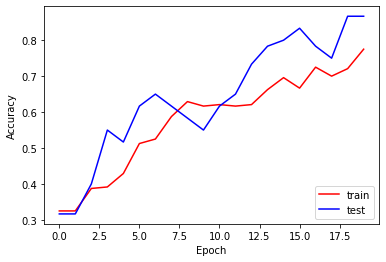

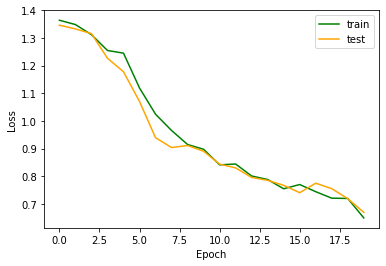

In [94]:
myModel(x_train_raw, y_train_raw, x_test, y_test)

# RELABELLED

In [76]:
x_train_rlb, y_train_rlb = img_processing('train_rlb', augment=False) # images were manually identified and relabelled correctly in this folder
print(x_train_rlb.shape)
print(y_train_rlb.shape)

(240, 64, 64, 3)
(240, 4)


Epoch 1/20
8/8 [==============================] - 1s 107ms/step - loss: 1.3646 - accuracy: 0.3250 - val_loss: 1.3468 - val_accuracy: 0.3167
Epoch 2/20
8/8 [==============================] - 1s 94ms/step - loss: 1.3490 - accuracy: 0.3250 - val_loss: 1.3332 - val_accuracy: 0.3167
Epoch 3/20
8/8 [==============================] - 1s 93ms/step - loss: 1.3124 - accuracy: 0.3875 - val_loss: 1.3162 - val_accuracy: 0.4000
Epoch 4/20
8/8 [==============================] - 1s 95ms/step - loss: 1.2552 - accuracy: 0.3917 - val_loss: 1.2271 - val_accuracy: 0.5500
Epoch 5/20
8/8 [==============================] - 1s 95ms/step - loss: 1.2455 - accuracy: 0.4292 - val_loss: 1.1782 - val_accuracy: 0.5167
Epoch 6/20
8/8 [==============================] - 1s 93ms/step - loss: 1.1196 - accuracy: 0.5125 - val_loss: 1.0707 - val_accuracy: 0.6167
Epoch 7/20
8/8 [==============================] - 1s 99ms/step - loss: 1.0247 - accuracy: 0.5250 - val_loss: 0.9397 - val_accuracy: 0.6500
Epoch 8/20
8/8 [==========

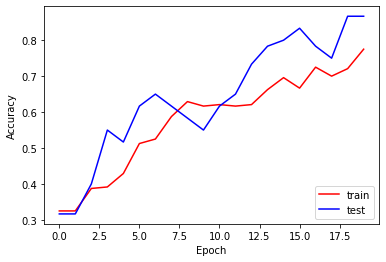

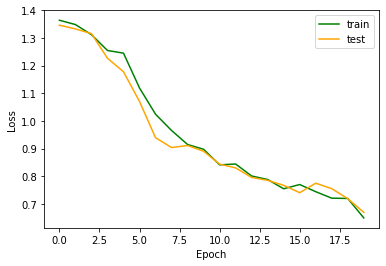

In [95]:
myModel(x_train_rlb, y_train_rlb, x_test, y_test)

# RELABELLED + CLASS EQUALISATION

In [78]:
def data_equalise_display(str1, str2):
        count_array = []
        for file in glob.glob(f'{str1}/*'): # to show before and after counts of equalisation function run in specified folder (str1)
                count_array.append(fruit_array(file)) # using same function as before to create y array
        print(f"{str2} equalisation", [sum(x) for x in zip(*count_array)])
        return count_array

def data_equalise(str):
        class_dict = {0:"apple", 1:"orange", 2:"banana", 3:"mixed"} # match classes to specific index
        count_array_sum = [sum(x) for x in zip(*data_equalise_display(f'{str}', 'Before'))] # summation of n dimension array into 1 dimensional array to view total counts per class
        limit = max(count_array_sum) # maximum count out of all classes, target counts for other classes to reach
        for i in range(4): #range value dependant on class number
                while count_array_sum[i]<limit: #loop to continue for all classes
                        run_count = 1 #number of times rotation augmentation has been run for the specific class
                        for img in glob.glob(f'{str}/*'): 
                                if fnmatch.fnmatch(img, f'*{class_dict[i]}*.jpg'): #if img is class specified
                                        img0 = Image.open(img).convert("RGB").resize((64,64)) 
                                        img0.rotate(45*(run_count)) #image rotation angle per loop for this class
                                        img0.save(f"{str}/{class_dict[i]}__{count_array_sum[i]}.jpg") # image saved after rotation
                                        count_array_sum[i] += 1 #count per class tracking, increased per image saved
                                        if count_array_sum[i] == limit: # termination of loop once equal to maximum class count
                                                break
                        run_count += 1
        
        data_equalise_display(f'{str}', 'After')     

data_equalise('train_rlb_eq')

Before equalisation [75, 75, 75, 75]
After equalisation [75, 75, 75, 75]


In [79]:
x_train_rlb_eq, y_train_rlb_eq = img_processing('train_rlb_eq', augment=False)
print(x_train_rlb_eq.shape)
print(y_train_rlb_eq.shape)

(300, 64, 64, 3)
(300, 4)


Epoch 1/20
10/10 [==============================] - 1s 102ms/step - loss: 1.3998 - accuracy: 0.2533 - val_loss: 1.3761 - val_accuracy: 0.4333
Epoch 2/20
10/10 [==============================] - 1s 92ms/step - loss: 1.3863 - accuracy: 0.2600 - val_loss: 1.3619 - val_accuracy: 0.3000
Epoch 3/20
10/10 [==============================] - 1s 92ms/step - loss: 1.3707 - accuracy: 0.2767 - val_loss: 1.3628 - val_accuracy: 0.3667
Epoch 4/20
10/10 [==============================] - 1s 92ms/step - loss: 1.3401 - accuracy: 0.3167 - val_loss: 1.2925 - val_accuracy: 0.4333
Epoch 5/20
10/10 [==============================] - 1s 92ms/step - loss: 1.3287 - accuracy: 0.3467 - val_loss: 1.2548 - val_accuracy: 0.5167
Epoch 6/20
10/10 [==============================] - 1s 94ms/step - loss: 1.2839 - accuracy: 0.3633 - val_loss: 1.2274 - val_accuracy: 0.4667
Epoch 7/20
10/10 [==============================] - 1s 98ms/step - loss: 1.2444 - accuracy: 0.4200 - val_loss: 1.1734 - val_accuracy: 0.4833
Epoch 8/20
1

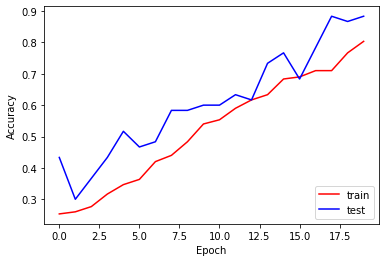

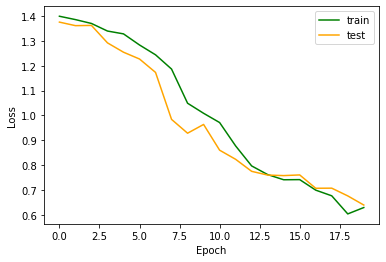

In [97]:
myModel(x_train_rlb_eq, y_train_rlb_eq, x_test, y_test)

# RELABELLED + CLASS EQUALISATION + FURTHER IMAGE AUGMENTATION

In [81]:
x_train_rlb_eq_aug, y_train_rlb_eq_aug = img_processing('train_rlb_eq', augment=True)
print(x_train_rlb_eq_aug.shape)
print(y_train_rlb_eq_aug.shape)

C:\Users\Leon (School)\AppData\Local\Temp\ipykernel_27240\2740887704.py:13: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img1 = img0.transpose(Image.FLIP_LEFT_RIGHT)


(1800, 64, 64, 3)
(1800, 4)


Epoch 1/20
57/57 [==============================] - 7s 114ms/step - loss: 1.3910 - accuracy: 0.2594 - val_loss: 1.3800 - val_accuracy: 0.4000
Epoch 2/20
57/57 [==============================] - 6s 105ms/step - loss: 1.3091 - accuracy: 0.3789 - val_loss: 1.0029 - val_accuracy: 0.6500
Epoch 3/20
57/57 [==============================] - 6s 105ms/step - loss: 1.0682 - accuracy: 0.5150 - val_loss: 0.7284 - val_accuracy: 0.7833
Epoch 4/20
57/57 [==============================] - 6s 104ms/step - loss: 0.7830 - accuracy: 0.6694 - val_loss: 0.4553 - val_accuracy: 0.9333
Epoch 5/20
57/57 [==============================] - 6s 104ms/step - loss: 0.6296 - accuracy: 0.7428 - val_loss: 0.5176 - val_accuracy: 0.9333
Epoch 6/20
57/57 [==============================] - 6s 105ms/step - loss: 0.4868 - accuracy: 0.8094 - val_loss: 0.5299 - val_accuracy: 0.9000
Epoch 7/20
57/57 [==============================] - 6s 104ms/step - loss: 0.4144 - accuracy: 0.8428 - val_loss: 0.5773 - val_accuracy: 0.9333
Epoch 

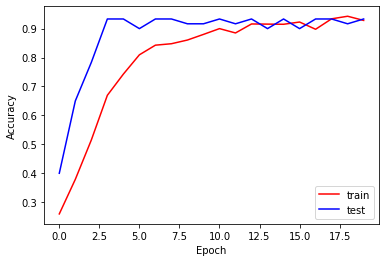

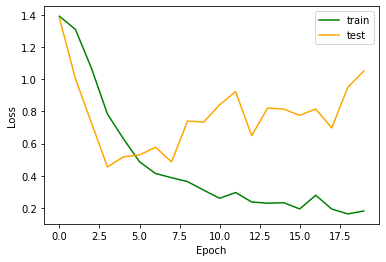

In [100]:
myModel(x_train_rlb_eq_aug, y_train_rlb_eq_aug, x_test, y_test)

| Conditions                         | Max accuracy score | Analysis                                                                                            |
|------------------------------------|--------------------|-----------------------------------------------------------------------------------------------------|
| Raw                                | 0.8666666746139526 | First run with given data                                                                           |
| Relabelled                         | 0.8666666746139526 | No improvement as only 3 images were updated                                                        |
| Relabelled + Equalised             | 0.8833333253860474 | Slight improvement as balanced training data improved accuracy                                      |
| Relabelled + Equalised + Augmented | 0.9333333373069763 | Significant improvement with training data size multiplied by 6<br>Accuracy graph shows optimal fit |